In [ ]:
!gunzip reviews.csv.gz

gzip: reviews.csv.gz: No such file or directory


In [ ]:
!gunzip calendar.csv.gz


In [ ]:
!gunzip listings.csv.gz

In [ ]:
import pandas as pd
df_listings = pd.read_csv('listings.csv')

In [ ]:
df_listings.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
df_calendar = pd.read_csv('calendar.csv')

<ipython-input-10-4be0211bfce7>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_calendar = pd.read_csv('calendar.csv')


In [ ]:
df_calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2595,2024-05-04,t,$225.00,NaN,30.0,1125.0
1,2595,2024-05-05,t,$225.00,NaN,30.0,1125.0
2,2595,2024-05-06,t,$225.00,NaN,30.0,1125.0
3,2595,2024-05-07,t,$225.00,NaN,30.0,1125.0
4,2595,2024-05-08,t,$225.00,NaN,30.0,1125.0
...,...,...,...,...,...,...,...
13942635,1145106757311187729,2025-04-28,t,$119.00,NaN,30.0,365.0
13942636,1145106757311187729,2025-04-29,t,$119.00,NaN,30.0,365.0
13942637,1145106757311187729,2025-04-30,t,$119.00,NaN,30.0,365.0
13942638,1145106757311187729,2025-05-01,t,$119.00,NaN,30.0,365.0


In [ ]:
import pandas as pd
nyc_df = pd.read_csv('nyc_data.csv', delimiter=',', index_col = 0, parse_dates = True)

In [ ]:
#libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns # Visualization
#from colorama import Fore

#plt.style.use('ggplot')


import warnings # Supress warnings
warnings.filterwarnings('ignore')

np.random.seed(7)

In [ ]:
nyc_df.head()

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077


In [ ]:
nyc_df = nyc_df.rename(columns = {'Demand': 'y'})
#sanity check
nyc_df.head(0)

,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,


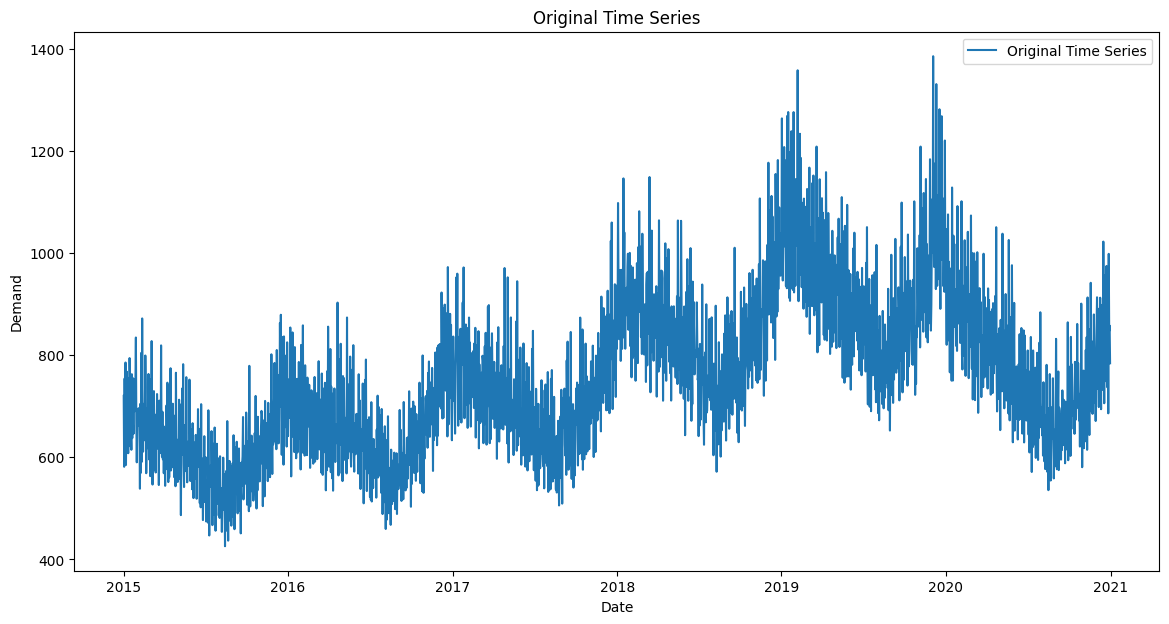

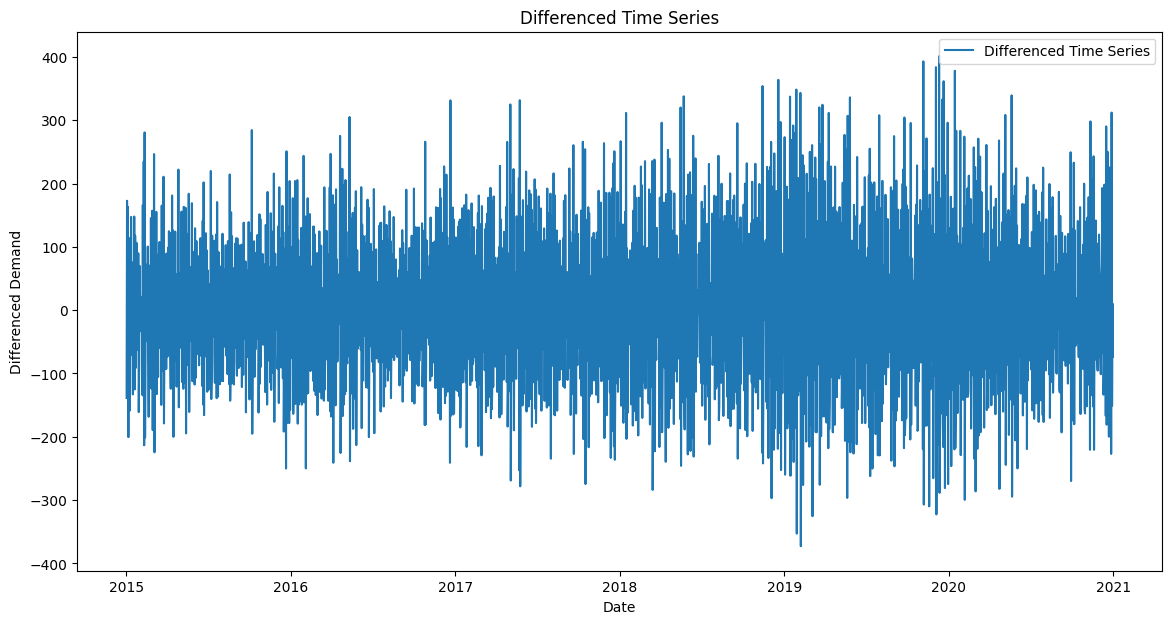

ADF Statistic: -12.00047515432753
p-value: 3.3557739456287946e-22
Critical Values:
   1%, -3.4333754500434264
Critical Values:
   5%, -2.862876536558312
Critical Values:
   10%, -2.56748150557262


In [ ]:
# differencing for stationarity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

nyc_df = nyc_df.rename(columns={'Demand': 'y'})

plt.figure(figsize=(14, 7))
plt.plot(nyc_df['y'], label='Original Time Series')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

# Applying Differencing
nyc_df['y_diff'] = nyc_df['y'].diff()

# Visualizing the Differenced Time Series
plt.figure(figsize=(14, 7))
plt.plot(nyc_df['y_diff'], label='Differenced Time Series')
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Demand')
plt.legend()
plt.show()

# Checking for Stationarity
def adf_test(series):
    result = adfuller(series.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Values:')
        print(f'   {key}, {value}')

# Performing the ADF test on the differenced series
adf_test(nyc_df['y_diff'])


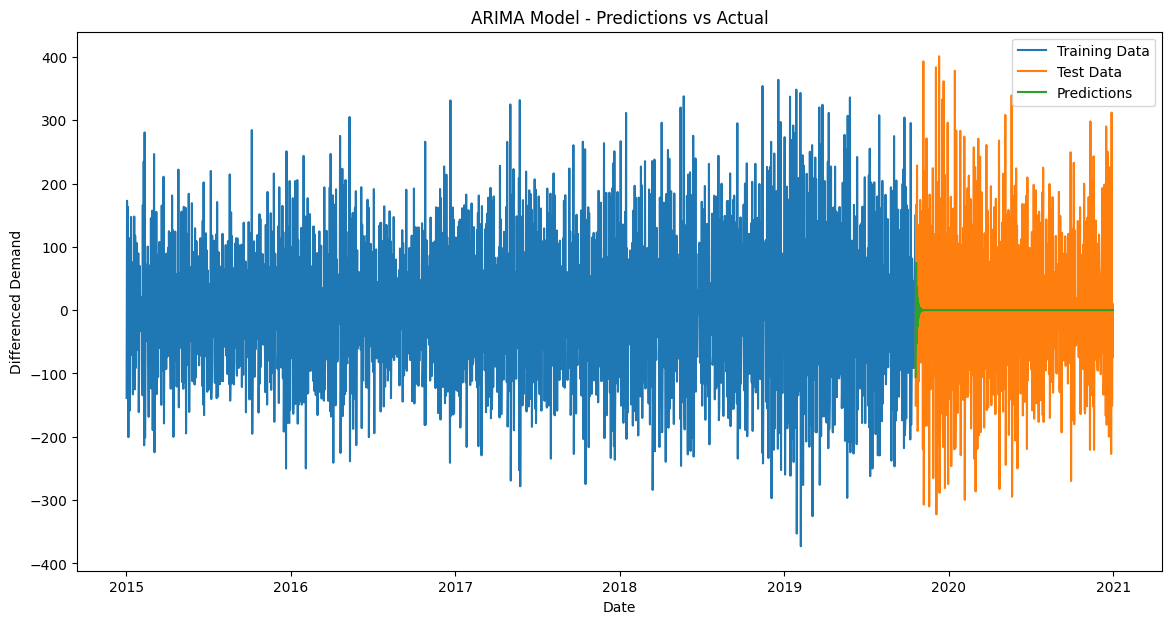

RMSE 148.48615984712035


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np


train_size = int(len(nyc_df) * 0.8)
train, test = nyc_df['y_diff'].iloc[:train_size], nyc_df['y_diff'].iloc[train_size:]

# Fitting the ARIMA model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

start = len(train)
end = len(train) + len(test) - 1
predictions = model_fit.predict(start=start, end=end, typ='levels')

mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
rmse

plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, predictions, label='Predictions')
plt.title('ARIMA Model - Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Differenced Demand')
plt.legend()
plt.show()

print('RMSE', rmse)


In [ ]:
# Calculating the mean and standard deviation of the 'Demand' column
mean_demand = nyc_df['y'].mean()
std_demand = nyc_df['y'].std()

mean_demand, std_demand


(756.0592268955749, 152.14307036122543)

Contextual Interpretation of RMSE:
Mean Demand:

The mean demand for Airbnb listings in your dataset is approximately 756.06.
Standard Deviation:

The standard deviation of the demand is approximately 152.14, indicating the variability in the demand values.
Relative Error (RMSE):

The RMSE of 148.49 compared to the mean demand of 756.06 suggests that the error is about 19.64% of the mean demand. This means that the model's predictions are, on average, about 19.64% off from the actual values.
Significance:
An RMSE of 148.49 in the context of a mean demand of 756.06 suggests a moderate level of prediction accuracy. The error is not negligible but might be acceptable depending on your specific requirements and tolerance for prediction errors.

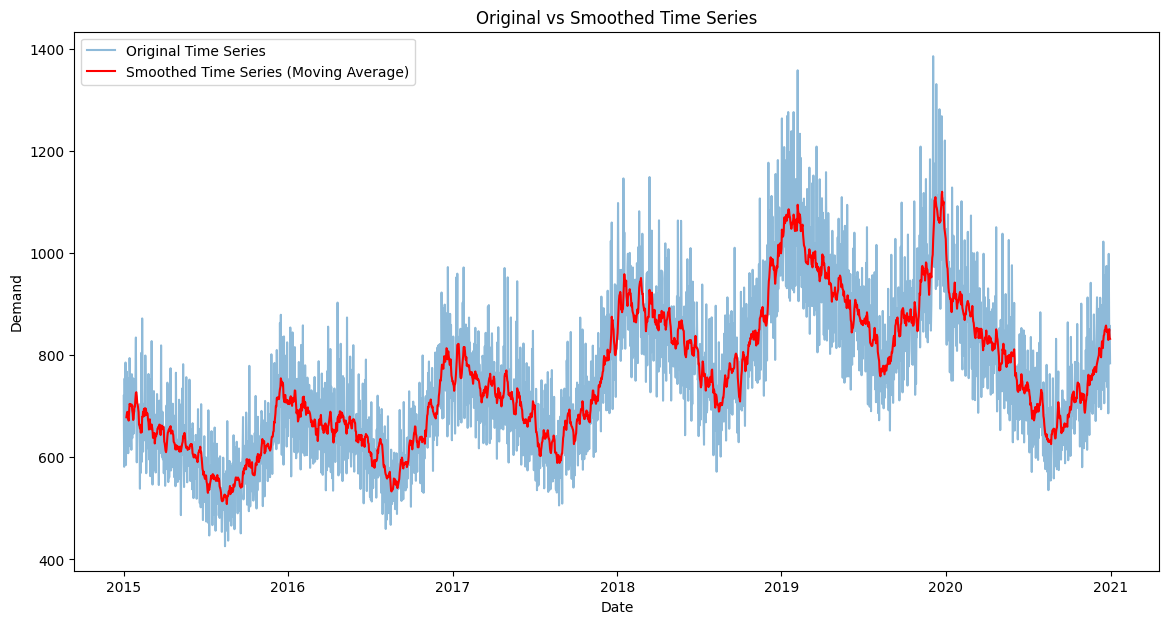

In [ ]:
# Applying the Moving Average Smoothing
window_size = 7  # Weekly smoothing
nyc_df['y_smooth'] = nyc_df['y'].rolling(window=window_size).mean()

# Plotting the smoothed time series
plt.figure(figsize=(14, 7))
plt.plot(nyc_df['y'], label='Original Time Series', alpha=0.5)
plt.plot(nyc_df['y_smooth'], label='Smoothed Time Series (Moving Average)', color='red')
plt.title('Original vs Smoothed Time Series')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression


nyc_df['y_shifted'] = nyc_df['y'].shift(1)
nyc_df.dropna(inplace=True)

train_size = int(len(nyc_df) * 0.8)
train, test = nyc_df.iloc[:train_size], nyc_df.iloc[train_size:]

X_train = train[['y_smooth']].values
y_train = train['y'].values
X_test = test[['y_smooth']].values
y_test = test['y'].values

# Fitting the Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

# Evaluating the model
reg_mse = mean_squared_error(y_test, y_pred)
reg_rmse = np.sqrt(reg_mse)

# Printing the RMSE values for comparison
rmse_arima = 148.486159948221
(reg_rmse, rmse_arima)


(88.77757854713653, 148.486159948221)

Comparison of Models
ARIMA Model RMSE: 148.49
Regression Model on Moving Averages RMSE: 88.78
Interpretation
Regression Model Performance:

The regression model using moving averages has a significantly lower RMSE (88.78) compared to the ARIMA model (148.49). This indicates that the regression model provides better predictions for this dataset.
Model Selection:

Based on the RMSE values, the regression model on moving averages is more accurate than the ARIMA model for your NYC Airbnb data. This suggests that the moving average feature captures important patterns in the data more effectively than the ARIMA model's approach.